<a href="https://colab.research.google.com/github/pentakll4002/encoding/blob/main/Target_Guided_Ordinal_Encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Target Guided Ordinal Encoding

####It is a technique used to encode categorical variables based on their relationship with the target variable. This encoding technique is useful when we have a categorical variable with a large number of unique categories, and we want to use this variable as a feature in our machine learning model.

#### In Target Guided Ordinal Encoding, we replace each category in the categorical variable with a numerical value based on the mean or median of the target variable for that category. This creates a monotonic relationship between the categorical variable and the target variable, which can improve the predictive power of our model.

#### Đây là một kỹ thuật để mã hóa các biến phân loại dựa trên mối quan hệ của chúng với biến mục tiêu. Kỹ thuật mã hóa này hữu ích khi chúng ta có một biến phân loại với nhiều danh mục độc đáo, và chúng ta muốn sử dụng biến này như một đặc trưng trong mô hình học máy của mình.

#### Trong Mã hóa thứ bậc có hướng mục tiêu, chúng ta thay thế mỗi danh mục trong biến phân loại bằng một giá trị số dựa trên giá trị trung bình hoặc trung vị của biến mục tiêu cho danh mục đó. Điều này tạo ra một mối quan hệ đơn điệu giữa biến phân loại và biến mục tiêu, điều này có thể cải thiện sức mạnh dự đoán của mô hình của chúng ta.


In [ ]:
import pandas as pd

# Create a sample dataframe with a categorical variable and a target variable
df = pd.DataFrame({
    'city': ['New York', 'London', 'Paris', 'Tokyo', 'New York', 'Paris'],
    'price': [200, 150, 300, 250, 180, 320]
})

In [ ]:
df

,city,price
0,New York,200
1,London,150
2,Paris,300
3,Tokyo,250
4,New York,180
5,Paris,320


In [ ]:
### Gộp nhóm tạo thành từ điển lấy giá trị trung bình
mean_price = df.groupby('city')['price'].mean().to_dict()

In [ ]:
mean_price

{'London': 150.0, 'New York': 190.0, 'Paris': 310.0, 'Tokyo': 250.0}

In [ ]:
df['city_encoded'] = df['city'].map(mean_price)

In [ ]:
df

,city,price,city_encoded
0,New York,200,190.0
1,London,150,150.0
2,Paris,300,310.0
3,Tokyo,250,250.0
4,New York,180,190.0
5,Paris,320,310.0


In [ ]:
df[['city', 'city_encoded']]

,city,city_encoded
0,New York,190.0
1,London,150.0
2,Paris,310.0
3,Tokyo,250.0
4,New York,190.0
5,Paris,310.0


In [ ]:
##### Practice: SEABORN (TIPS)
import seaborn as sns
df = sns.load_dataset('tips')

In [ ]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
mean_total = df.groupby('time')['total_bill'].mean().to_dict()

<ipython-input-20-02283b058553>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_total = df.groupby('time')['total_bill'].mean().to_dict()


In [ ]:
df['mean_encoded'] = df['time'].map(mean_total)

In [ ]:
df[['time', 'total_bill', 'mean_encoded']]

,time,total_bill,mean_encoded
0,Dinner,16.99,20.797159
1,Dinner,10.34,20.797159
2,Dinner,21.01,20.797159
3,Dinner,23.68,20.797159
4,Dinner,24.59,20.797159
...,...,...,...
239,Dinner,29.03,20.797159
240,Dinner,27.18,20.797159
241,Dinner,22.67,20.797159
242,Dinner,17.82,20.797159


<Axes: >

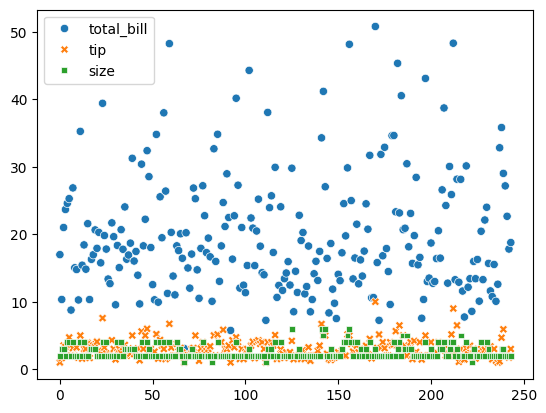

In [ ]:
sns.scatterplot(data=df)